In [2]:
import numpy as np
import random as rd
import scipy as sp

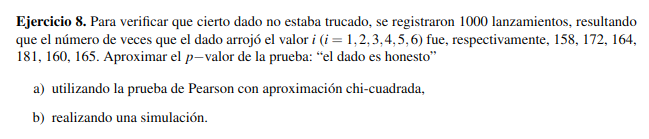

En este caso al ser un dado las probabilidades son iguales para cada valor, 1/6. Para utilizar la prueba de Pearson con aproximación chi cuadrada. Primero calculo el estadistico T segun la muestra. Y luego calculo el p valor como P(T > t) que es lo mismo que 1 - P(T <= t). Luego sabemos que T distribuye como una chi cuadrada con k-1 grados de libertad, donde k es el número de agrupamientos de valores considerados. 
 

In [6]:
def estadistico(n, pi,Ni):
    t = 0
    for i in range(len(Ni)):
        t += ((Ni[i] - n*pi[i])**2)/(n*pi[i])
    return t

def calcular_pvalor(t, k):
    return 1 - sp.stats.chi2.cdf(t, k-1)

In [23]:
n = 1000
pi = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
Ni = [158, 172, 164, 181, 160, 165]
T = estadistico(n, pi, Ni)
pvalor = calcular_pvalor(T, len(Ni))
print("El p-valor es: ", round(pvalor, 5))

El p-valor es:  0.82372


In [17]:
def gen_va():
    return rd.randint(0,5)

def gen_muestra(n):
    ni = np.zeros(6) 
    for i in range(n):
        ni[gen_va()] += 1
    return ni

In [18]:
def sim_p_valor(nsims, n, pi, ni):
    t_est = 0
    t = estadistico(n, pi, ni)
    for i in range(nsims):
        muestra = gen_muestra(n) # genero una nueva muestra de tamaño n
        t1 = estadistico(n, pi, muestra)  # calculo un nuevo estadistico

        if t1 >= t:
            t_est += 1

    return t_est/nsims

In [19]:
n = 1000
pi = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
Ni = [158, 172,  164, 181, 160, 165]
nsims = 10000
pvalor = sim_p_valor(nsims, n, pi, Ni)
print("El p-valor simulado es: ", round(pvalor, 5)) 

El p-valor simulado es:  0.8238
